# Auswertung der Messfahrten mit einem römischen Pram auf der Mosel

In [1]:
import sys
import glob
import time
import os
import datetime

import numpy as np
import openpyxl
import matplotlib as mpl
import matplotlib.pyplot as plt
import mpld3

# on my computer NX2 is not installed, I just import the code directly from the development directory
sys.path.append(os.path.abspath('../NX2'))
import NX2

%matplotlib inline
# Activate js output for every figure
# mpld3.enable_notebook()

Pfad zu den lokalen Daten

In [2]:
db_path = '/home/moritz/Dropbox/'
db_path = '/melkor/d1/guenther/Dropbox/'

datapath15 = os.path.join(db_path, 'NX2/2015/')
plotpath15 = os.path.join(db_path, 'NX2/2015/')
datapath16 = os.path.join(db_path, 'NX2/2016/')
plotpath16 = os.path.join(db_path, 'NX2/2016/')


## Vorbereitung : Daten einlesen und kalibrieren

### NX2 Daten einlesen

In [3]:
def read_year(datapath):
    nx2files = glob.glob(os.path.join(datapath, '*csv'))
    nx2files.sort()
    nxdat = []
    for f in nx2files:
        print 'Readding {0}'.format(f)
        date = os.path.basename(f)
        nxdat.append(NX2.NX2Table(f, (int(date[6:8]), int(date[4:6]), int(date[:4])), origin=(49.7186, 6.6065)))
    return nxdat

In [4]:
nxdat15 = read_year(datapath15)

Readding /melkor/d1/guenther/Dropbox/NX2/2015/20150428_firstday.00.csv
Reading new format NX2 table - Export with 1.08 or later
Readding /melkor/d1/guenther/Dropbox/NX2/2015/20150428_firstday2.00.csv
Reading new format NX2 table - Export with 1.08 or later


/melkor/d1/guenther/projects/NX2/NX2/NX2/NX2.py:232: NX2InterpolationWarning: Interpolating over missing values in column AWA
Maximum data gap is 7 lines.
  warn(NX2InterpolationWarning(column, max([len(list(v)) for g, v in itertools.groupby(index) if not g])))
/melkor/d1/guenther/projects/NX2/NX2/NX2/NX2.py:232: NX2InterpolationWarning: Interpolating over missing values in column AWS
Maximum data gap is 7 lines.
  warn(NX2InterpolationWarning(column, max([len(list(v)) for g, v in itertools.groupby(index) if not g])))
/melkor/d1/guenther/projects/NX2/NX2/NX2/NX2.py:232: NX2InterpolationWarning: Interpolating over missing values in column TWA
Maximum data gap is 7 lines.
  warn(NX2InterpolationWarning(column, max([len(list(v)) for g, v in itertools.groupby(index) if not g])))
/melkor/d1/guenther/projects/NX2/NX2/NX2/NX2.py:232: NX2InterpolationWarning: Interpolating over missing values in column TWS
Maximum data gap is 7 lines.
  warn(NX2InterpolationWarning(column, max([len(list(v)) fo

Readding /melkor/d1/guenther/Dropbox/NX2/2015/20150428_firstday3.00.csv
Reading new format NX2 table - Export with 1.08 or later
Readding /melkor/d1/guenther/Dropbox/NX2/2015/20150429_secondday.00.csv


/melkor/d1/guenther/projects/NX2/NX2/NX2/NX2.py:232: NX2InterpolationWarning: Interpolating over missing values in column TIME
Maximum data gap is 1 lines.
  warn(NX2InterpolationWarning(column, max([len(list(v)) for g, v in itertools.groupby(index) if not g])))


Reading new format NX2 table - Export with 1.08 or later
Readding /melkor/d1/guenther/Dropbox/NX2/2015/20150429_secondday2.00.csv
Reading new format NX2 table - Export with 1.08 or later
Readding /melkor/d1/guenther/Dropbox/NX2/2015/20150429_secondday3.00.csv


/melkor/d1/guenther/projects/NX2/NX2/NX2/NX2.py:160: NX2InterpolationWarning: column AWA contains more than 2% nans. No automatic interpolation performed.
  warn(NX2InterpolationWarning(name))
/melkor/d1/guenther/projects/NX2/NX2/NX2/NX2.py:160: NX2InterpolationWarning: column AWS contains more than 2% nans. No automatic interpolation performed.
  warn(NX2InterpolationWarning(name))
/melkor/d1/guenther/projects/NX2/NX2/NX2/NX2.py:160: NX2InterpolationWarning: column TWA contains more than 2% nans. No automatic interpolation performed.
  warn(NX2InterpolationWarning(name))
/melkor/d1/guenther/projects/NX2/NX2/NX2/NX2.py:160: NX2InterpolationWarning: column TWS contains more than 2% nans. No automatic interpolation performed.
  warn(NX2InterpolationWarning(name))


Reading new format NX2 table - Export with 1.08 or later


/melkor/d1/guenther/projects/NX2/NX2/NX2/NX2.py:232: NX2InterpolationWarning: Interpolating over missing values in column TIME
Maximum data gap is 2 lines.
  warn(NX2InterpolationWarning(column, max([len(list(v)) for g, v in itertools.groupby(index) if not g])))
/melkor/d1/guenther/projects/NX2/NX2/NX2/NX2.py:232: NX2InterpolationWarning: Interpolating over missing values in column LAT
Maximum data gap is 2 lines.
  warn(NX2InterpolationWarning(column, max([len(list(v)) for g, v in itertools.groupby(index) if not g])))
/melkor/d1/guenther/projects/NX2/NX2/NX2/NX2.py:232: NX2InterpolationWarning: Interpolating over missing values in column LON
Maximum data gap is 2 lines.
  warn(NX2InterpolationWarning(column, max([len(list(v)) for g, v in itertools.groupby(index) if not g])))
/melkor/d1/guenther/projects/NX2/NX2/NX2/NX2.py:232: NX2InterpolationWarning: Interpolating over missing values in column DFT
Maximum data gap is 3 lines.
  warn(NX2InterpolationWarning(column, max([len(list(v)) f

In [5]:
nxdat16 = read_year(datapath16)

Readding /melkor/d1/guenther/Dropbox/NX2/2016/20160927_firstday_stak.00.csv
Reading new format NX2 table - Export with 1.08 or later
Readding /melkor/d1/guenther/Dropbox/NX2/2016/20160928_secondday_segel.00.csv
Reading new format NX2 table - Export with 1.08 or later
Readding /melkor/d1/guenther/Dropbox/NX2/2016/20160928_secondday_segel2.00.csv


/melkor/d1/guenther/projects/NX2/NX2/NX2/NX2.py:232: NX2InterpolationWarning: Interpolating over missing values in column AWA
Maximum data gap is 1 lines.
  warn(NX2InterpolationWarning(column, max([len(list(v)) for g, v in itertools.groupby(index) if not g])))
/melkor/d1/guenther/projects/NX2/NX2/NX2/NX2.py:160: NX2InterpolationWarning: column AWA contains more than 2% nans. No automatic interpolation performed.
  warn(NX2InterpolationWarning(name))
/melkor/d1/guenther/projects/NX2/NX2/NX2/NX2.py:160: NX2InterpolationWarning: column AWS contains more than 2% nans. No automatic interpolation performed.
  warn(NX2InterpolationWarning(name))
/melkor/d1/guenther/projects/NX2/NX2/NX2/NX2.py:160: NX2InterpolationWarning: column TWA contains more than 2% nans. No automatic interpolation performed.
  warn(NX2InterpolationWarning(name))
/melkor/d1/guenther/projects/NX2/NX2/NX2/NX2.py:160: NX2InterpolationWarning: column TWS contains more than 2% nans. No automatic interpolation performed.
  wa

Reading new format NX2 table - Export with 1.08 or later
Readding /melkor/d1/guenther/Dropbox/NX2/2016/20160928_secondday_segel3.00.csv


/melkor/d1/guenther/projects/NX2/NX2/NX2/NX2.py:232: NX2InterpolationWarning: Interpolating over missing values in column AWA
Maximum data gap is 1 lines.
  warn(NX2InterpolationWarning(column, max([len(list(v)) for g, v in itertools.groupby(index) if not g])))


Reading new format NX2 table - Export with 1.08 or later
Readding /melkor/d1/guenther/Dropbox/NX2/2016/20160928_secondday_stak.00.csv
Reading new format NX2 table - Export with 1.08 or later


/melkor/d1/guenther/projects/NX2/NX2/NX2/NX2.py:232: NX2InterpolationWarning: Interpolating over missing values in column AWA
Maximum data gap is 1 lines.
  warn(NX2InterpolationWarning(column, max([len(list(v)) for g, v in itertools.groupby(index) if not g])))
/melkor/d1/guenther/projects/NX2/NX2/NX2/NX2.py:232: NX2InterpolationWarning: Interpolating over missing values in column AWA
Maximum data gap is 13 lines.
  warn(NX2InterpolationWarning(column, max([len(list(v)) for g, v in itertools.groupby(index) if not g])))
/melkor/d1/guenther/projects/NX2/NX2/NX2/NX2.py:232: NX2InterpolationWarning: Interpolating over missing values in column AWS
Maximum data gap is 13 lines.
  warn(NX2InterpolationWarning(column, max([len(list(v)) for g, v in itertools.groupby(index) if not g])))
/melkor/d1/guenther/projects/NX2/NX2/NX2/NX2.py:232: NX2InterpolationWarning: Interpolating over missing values in column TWA
Maximum data gap is 12 lines.
  warn(NX2InterpolationWarning(column, max([len(list(v))

Readding /melkor/d1/guenther/Dropbox/NX2/2016/20160929_thirdday_treidel1.00.csv
Reading new format NX2 table - Export with 1.08 or later
Readding /melkor/d1/guenther/Dropbox/NX2/2016/20160929_thirdday_treidel2.00.csv
Reading new format NX2 table - Export with 1.08 or later
Readding /melkor/d1/guenther/Dropbox/NX2/2016/20160929_thirdday_treidel3.00.csv


/melkor/d1/guenther/projects/NX2/NX2/NX2/NX2.py:232: NX2InterpolationWarning: Interpolating over missing values in column AWA
Maximum data gap is 1 lines.
  warn(NX2InterpolationWarning(column, max([len(list(v)) for g, v in itertools.groupby(index) if not g])))


Reading new format NX2 table - Export with 1.08 or later


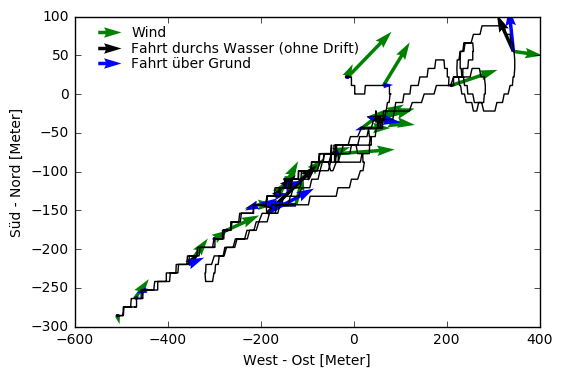

In [6]:
# Just check that all looks OK for one example
out = nxdat16[0].plot_course()

### Output gpx

In [7]:
for n in nxdat15:
    n.write_gpx(os.path.join(plotpath15, os.path.basename(n.filename).split('.')[0] + '.gpx'))
for n in nxdat16:
    n.write_gpx(os.path.join(plotpath16, os.path.basename(n.filename).split('.')[0] + '.gpx'))

### Kraftmessung einlesen

In [8]:
# I have those files only for 2015
xlsxfiles1 = glob.glob(os.path.join(datapath15, '20150428*', '*.xlsx'))
xlsxfiles2 = glob.glob(os.path.join(datapath15, '20150429*', '*.xlsx'))

In [9]:
def add_Kraft(nx2, xlsxfiles, delta_t=datetime.timedelta(0)):
    '''Add Kraftmessung from Excelfile zu den Daten
    
    There is no return value - the NX2 object is modified in place by adding a column.
    
    Note that this is a very simple and inefficient implementation, but "good enough" for current purposes.
    
    Parameters
    ----------
    nx2 : NX2.NX2 object
        NX2 data
    xlsxfiles : list of strings
        list of filenames
    delta_t : datetime.timedelta
        Time offset between the Kraftmessung and the NX2 data due to not synchronized clocks in the laptops
        that recorded the data.
        `delta_t` is *added* to the Kraft time; it can be a negative value to move the time in the other
        direction.ss
    '''
    for f in xlsxfiles:
        wb = openpyxl.load_workbook(f)
        sheet = wb.active
        assert sheet['A1'].value == 'Time'
        assert sheet['B1'].value == 'Winkel'
        assert sheet['C1'].value == 'Kraft'
        Time = [x.value + delta_t for x in sheet['A'][1:]]
        Winkel = [x.value for x in sheet['B'][1:]]
        Kraft = [x.value for x in sheet['C'][1:]]
        # Check if any of the values in file f might be relevant
        nx2start = datetime.datetime(nx2.year[0], nx2.month[0], nx2.day[0], nx2.hour[0], nx2.minute[0], nx2.sec[0])
        nx2stop = datetime.datetime(nx2.year[-1], nx2.month[-1], nx2.day[-1], nx2.hour[-1], nx2.minute[-1], nx2.sec[-1])
        # This assumes that both datasets are ordered in time
        if ((nx2start < Time[-1]) and (nx2stop > Time[0])):
            if 'Kraft' not in nx2.names:
                nx2.add_empty_column('Kraft', dtype=np.float, null=np.nan)
                nx2.add_empty_column('Winkel', dtype=np.float, null=np.nan)
            # Both datasets are ordered in time with time steps of ~1 or ~0.5 s. 
            # A better implemenation would use this fact and not compare to the full nx2 data,
            # just to n+/-2 steps, where n is the value found for ind in the previous loop.
            # However, we run this only once and computer time is much cheaper than developer time,
            # so brute-force it is for now.
            for t, k, w in zip(Time, Kraft, Winkel):
                ind = ((t.year == nx2['year']) & 
                       (t.month == nx2['month']) & 
                       (t.day == nx2['day']) & 
                       (t.hour == nx2['hour']) & 
                       (t.minute == nx2['minute']) & 
                       (t.second == nx2['sec']))
                nx2['Kraft'][ind] = k
                nx2['Winkel'][ind] = w
        

In [10]:
# This takes a while, because the algorithm is very inefficient.
# We can save some time here by merging with the small NX2 files before we merge those but if 
# we need this any faster, we should really go into ``add_Kraft`` and improve that.
for d in nxdat15:
    add_Kraft(d, xlsxfiles1, delta_t=datetime.timedelta(seconds=-15))
    add_Kraft(d, xlsxfiles2, delta_t=datetime.timedelta(seconds=-2))

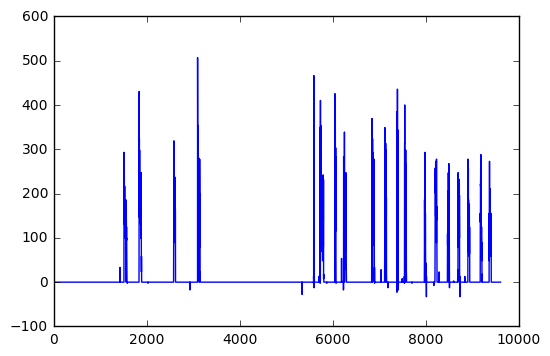

In [11]:
# Check that Kraft was loaded at all
plt.plot(nxdat15[3]['Kraft'])
plt.show()

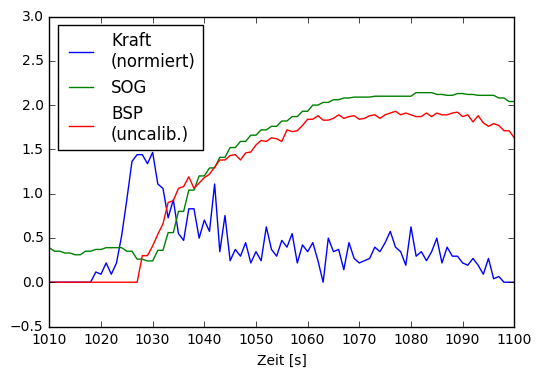

In [12]:
# Check that Kraft and NX2 data are properly aligned
plt.plot(nxdat15[1]['Kraft']/200, label='Kraft\n(normiert)')
plt.plot(nxdat15[1]['SOG'], label='SOG')
plt.plot(nxdat15[1]['BSP'], label='BSP\n(uncalib.)')
plt.xlim([1010,1100])
plt.legend(loc='upper left')
plt.xlabel('Zeit [s]')

### Logkallibration 2015

In [13]:
# Welcher Datensatz enthält die Kalibrationsfahrt?
nx5 = nxdat15[5]
nx5.datetime()[[0,-1]]

array([ datetime.datetime(2015, 4, 29, 15, 37, 46, tzinfo=<DstTzInfo 'Europe/Berlin' CEST+2:00:00 DST>),
       datetime.datetime(2015, 4, 29, 16, 50, 4, tzinfo=<DstTzInfo 'Europe/Berlin' CEST+2:00:00 DST>)], dtype=object)

/nfs/melkor/d1/guenther/soft/anaconda/lib/python2.7/site-packages/dateutil/rrule.py:450: DeprecationWarning: Using both 'count' and 'until' is inconsistent with RFC 2445 and has been deprecated in dateutil. Future versions will raise an error.
  "raise an error.", DeprecationWarning)


/nfs/melkor/d1/guenther/soft/anaconda/lib/python2.7/site-packages/dateutil/rrule.py:450: DeprecationWarning: Using both 'count' and 'until' is inconsistent with RFC 2445 and has been deprecated in dateutil. Future versions will raise an error.
  "raise an error.", DeprecationWarning)
/nfs/melkor/d1/guenther/soft/anaconda/lib/python2.7/site-packages/dateutil/rrule.py:450: DeprecationWarning: Using both 'count' and 'until' is inconsistent with RFC 2445 and has been deprecated in dateutil. Future versions will raise an error.
  "raise an error.", DeprecationWarning)
/nfs/melkor/d1/guenther/soft/anaconda/lib/python2.7/site-packages/dateutil/rrule.py:450: DeprecationWarning: Using both 'count' and 'until' is inconsistent with RFC 2445 and has been deprecated in dateutil. Future versions will raise an error.
  "raise an error.", DeprecationWarning)


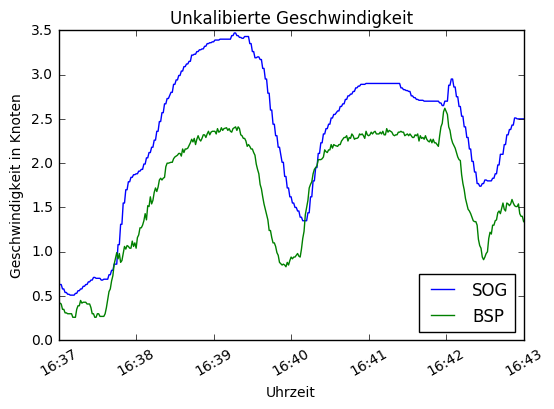

In [14]:
n = nx5.when((16,37,00),(16,43,00))
fig = n.plot_speeds()
plt.legend(loc='lower right')
plt.title('Unkalibierte Geschwindigkeit')

Wir haben hier nur eine einzige Kalibrationsfahrt, die wir nutzen können. Leider sind die Daten nicht ideal, um einen automatischen fit des Korrekturfaktors durchzuführen:

- SOG and BSP sind zeitlich ein paar Sekunden gegeneinander versetzt, weil die SOG aus der Differenz der GPS Positionen berechnet wird.
- Bei bei der ersten Etappe gegen 16:39 Uhr gibt es keine gutes Plateau, das gefittet werden kann. Hier muss man ohnehin per Auge entscheiden, welche Datenpunkte gut sind und welche noch zur Beschleunigung gehören.

Deshalb wird der Korrkturfaktor im Folgenden per Auge bestimmt.

/nfs/melkor/d1/guenther/soft/anaconda/lib/python2.7/site-packages/dateutil/rrule.py:450: DeprecationWarning: Using both 'count' and 'until' is inconsistent with RFC 2445 and has been deprecated in dateutil. Future versions will raise an error.
  "raise an error.", DeprecationWarning)
/nfs/melkor/d1/guenther/soft/anaconda/lib/python2.7/site-packages/dateutil/rrule.py:450: DeprecationWarning: Using both 'count' and 'until' is inconsistent with RFC 2445 and has been deprecated in dateutil. Future versions will raise an error.
  "raise an error.", DeprecationWarning)
/nfs/melkor/d1/guenther/soft/anaconda/lib/python2.7/site-packages/dateutil/rrule.py:450: DeprecationWarning: Using both 'count' and 'until' is inconsistent with RFC 2445 and has been deprecated in dateutil. Future versions will raise an error.
  "raise an error.", DeprecationWarning)


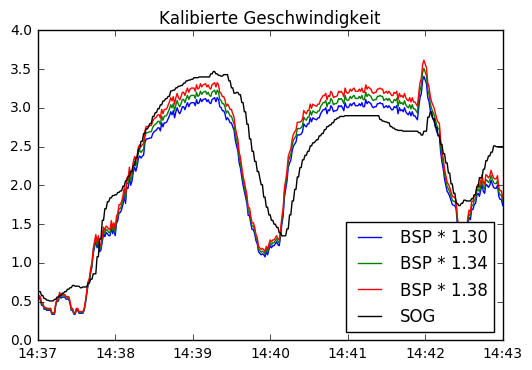

In [15]:
for corrfac in [1.3, 1.34, 1.38]:
    n = nx5.when((16,37,00),(16,43,00))
    n['BSP'] *=corrfac
    plt.plot(n.datetime(), n['BSP'], label='BSP * {0:4.2f}'.format(corrfac))
plt.plot(n.datetime(), n['SOG'], 'k', label='SOG')
plt.legend(loc='lower right')
plt.title('Kalibierte Geschwindigkeit')
ax = plt.gca()
ax.xaxis.set_major_formatter(mpl.dates.DateFormatter('%H:%M', tz=None))

In diesem Plot sieht man in schwarz die SOG (speed over ground = Geschwindigkeit über Grund), die mit dem GPS gemessen wurde. Wegen der Strömung liegt die BSP (boat speed = Geschwindigkeit gegen das Wasser) von 16:38 bis 16:40 unter der SOG (das Boot fährt nicht nur durchs Wasser, sondern treibt zusätzlich mit der Strömung) und dann ab 16:40, nachdem das Boot wieder stromauf fährt, über der SOG. Da in diesem Experiment die selbe Strecke hin- und hergefahren wird, sollte der Abstand zwischen BSP und SOG auf beiden Seiten gleich gross sein. Die grüne Line erreicht dieses Ziel, indem sie die BSP mit einem Faktor von 1.34 korrigiert. Zum Vergleich sind auch Korrkturfaktoren von 1.30 und 1.38 gezeigt. Hier sieht man schon deutlich, dass die rote Linie um 16:39 Uhr näher an der SOG liegt als um 16:41, bei der blauen Linie ist es andersherum. Daraus kann man ablesen, dass der Korrekturfaktor 1.34 auf ca. 3% genau abgelesen werden kann.

Wir wenden im Folgenden den Korrekturfaktor 1.34 an. In der Praxis ist die Unischerheit über den genauen Wert diese Faktors aber nicht nur davon abhängig, wie genau man ihn in diesem Diagram ablesen kann, sondern er hängt auch davon ab, dass das Log immer genau gleich am Schiff montiert wurde, dass es immer genau gleich tief ins Wasser eingetaucht ist oder dass die die Anströmung nicht geändert hat, wenn z.B. Ladung an Bord genommen wurde.

In [16]:
for nx in nxdat15:
    nx['BSP'] *= 1.34

### Logkalibration 2016

/nfs/melkor/d1/guenther/soft/anaconda/lib/python2.7/site-packages/dateutil/rrule.py:450: DeprecationWarning: Using both 'count' and 'until' is inconsistent with RFC 2445 and has been deprecated in dateutil. Future versions will raise an error.
  "raise an error.", DeprecationWarning)
/nfs/melkor/d1/guenther/soft/anaconda/lib/python2.7/site-packages/dateutil/rrule.py:450: DeprecationWarning: Using both 'count' and 'until' is inconsistent with RFC 2445 and has been deprecated in dateutil. Future versions will raise an error.
  "raise an error.", DeprecationWarning)
/nfs/melkor/d1/guenther/soft/anaconda/lib/python2.7/site-packages/dateutil/rrule.py:450: DeprecationWarning: Using both 'count' and 'until' is inconsistent with RFC 2445 and has been deprecated in dateutil. Future versions will raise an error.
  "raise an error.", DeprecationWarning)
/nfs/melkor/d1/guenther/soft/anaconda/lib/python2.7/site-packages/dateutil/rrule.py:450: DeprecationWarning: Using both 'count' and 'until' is in

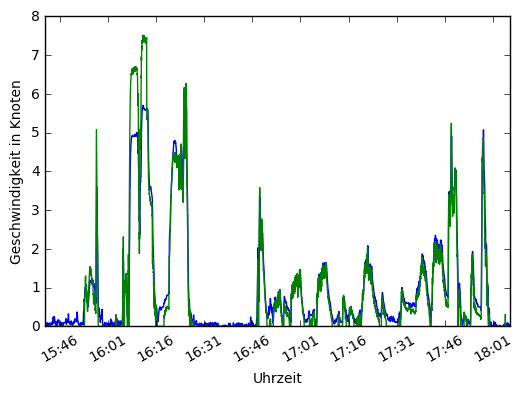

In [20]:
n0 = nxdat16[0].when(t2=(16, 13, ))
out = nxdat16[0].plot_speeds()

Leider wurde die Einstellung fur die Logkalibration im Laufe der Fahrt verandert. Deshalb muss ich den ersten Datensatz hier teilen.

In [28]:
nxdat16[1].filename

'/melkor/d1/guenther/Dropbox/NX2/2016/20160928_secondday_segel.00.csv'

In [ ]:
fit, ind = dat0661.fit_BSP_corr()
fit.pprint()
plt.plot(dat0661.SOG[~ind], dat0661.BSP[~ind],'y.', label = 'data not used in fit')
plt.plot(dat0661.SOG[ind], dat0661.BSP[ind],'k.', label = 'data')
plt.plot(plt.xlim(), fit.beta * plt.xlim(), label = 'fit')
plt.plot(plt.xlim(), 1.15 * np.array(plt.xlim()), 'r', label = 'old notes')
plt.xlabel('SOG')
plt.ylabel('BSP')
plt.legend(loc = 'upper left')

In [21]:
def fitplot_BSP(data, ax, title = ''):
    fit, ind = data.fit_BSP_corr()
    ax.plot(data.SOG[~ind], data.BSP[~ind], 'y.', label = 'data not used for fit')
    ax.plot(data.SOG[ind], data.BSP[ind],'k.', label = 'data')
    ax.plot(plt.xlim(), fit.beta * plt.xlim(), label = 'fit')
    ax.set_title(titel + '$\\beta = ${0:4.2f}'.format(fit.beta[0]))

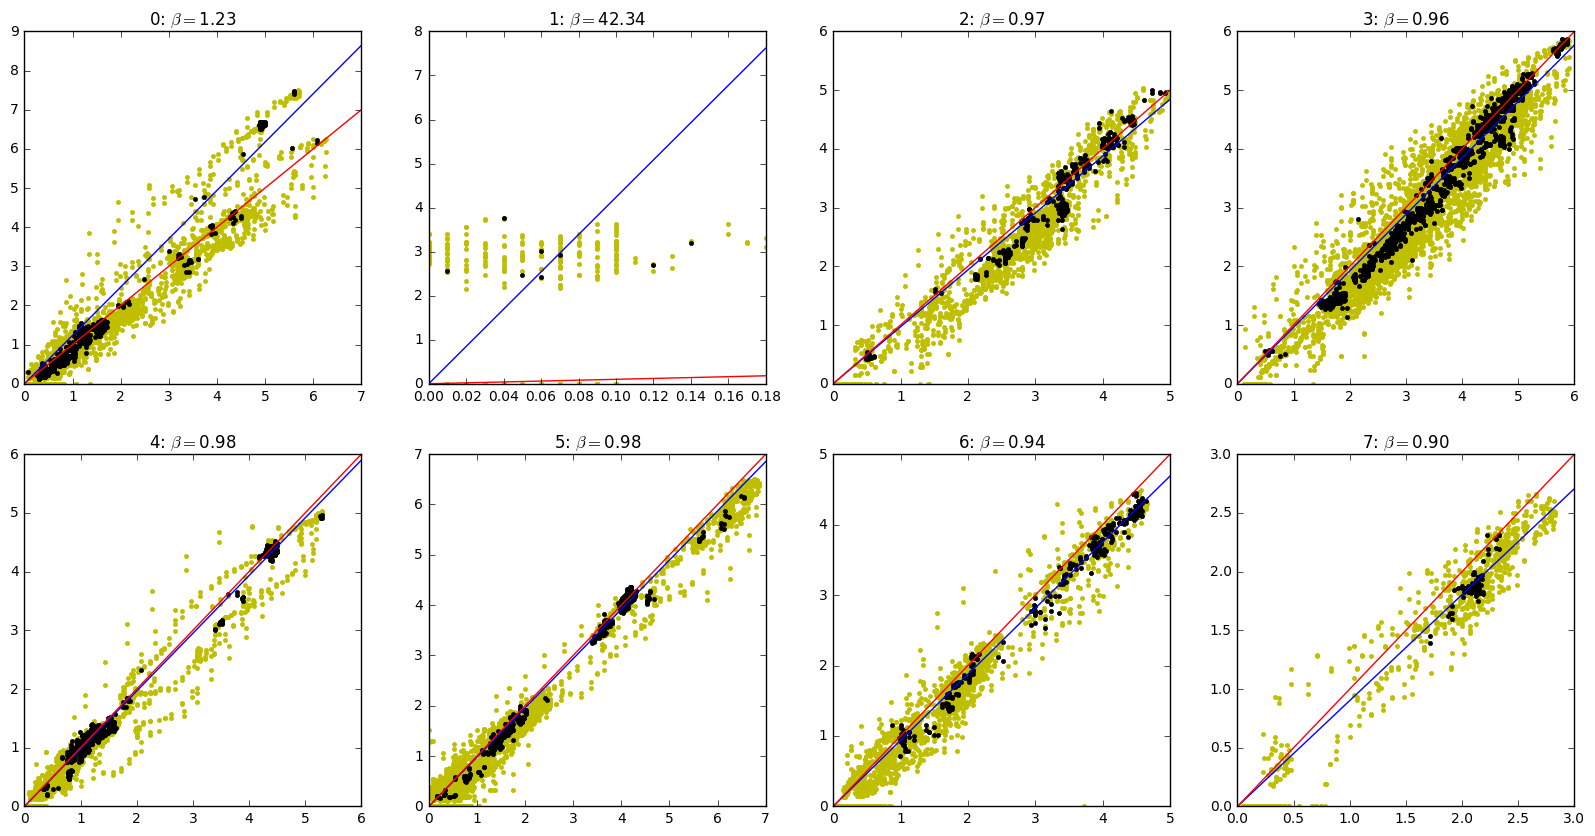

In [24]:
fig = plt.figure(figsize = (20,10))
for i, data in enumerate(nxdat16):
    ax = fig.add_subplot(2,4,i+1)
    fitplot_BSP(data, ax, titel = str(i)+': ')
    ax.plot(plt.xlim(), np.array([1.]) * plt.xlim(), 'r', label = 'm = 1.')

### Master NX2 file für jeden Tag

Bisher sind die Daten so organisiert, wie ich sie eingelesen habe - für jedes NX2 file gibt es genau ein ``nx2`` Objekt, dass diese Daten enthält und die einzelnen Objekte sind in der Liste ``nxdat`` gespeichert. Das ist auch alles gut und richtig so, aber für das Untersuchen der Daten ist es oft einfacher, wenn ich alle Datensätze zu einer großen Tabelle zusammenfüge.

In [19]:
print nx2files
# All nx2 Instancen mussen die gleichen Spalten haben, um sie zusammenzufügen.
for nx2 in nxdat:
    if 'Kraft' not in nx2.names:
        nx2.add_empty_column('Kraft', dtype=np.float, null=np.nan)
        nx2.add_empty_column('Winkel', dtype=np.float, null=np.nan)

NameError: name 'nx2files' is not defined

In [ ]:
nx2day1 = nxdat[0].where(np.ones(len(nxdat[0]), dtype=int)) # make a copy
nx2day1.append(nxdat[1])
nx2day1.append(nxdat[2])
nx2day2 = nxdat[3].where(np.ones(len(nxdat[3]), dtype=int)) # make a copy
nx2day2.append(nxdat[4])
nx2day2.append(nxdat[5])
# Und noch mal alle...
nx2d21 = nx2day1.where(np.ones(len(nx2day1), dtype=int)) # make a copy
nx2d21.append(nx2day2)